# A Movie Recommendation Analysis Project as done by Akingbeni David

## Importing Basic Libraries

In [1]:
#for table manipulation and calculation
import pandas as pd
import numpy as np

#for data vizualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#For interactive plotting
from ipywidgets import widgets, interact, interact_manual
#from Ipython.disaplay import display

#for vizualization size and setup
plt.rcParams["figure.figsize"] = (16, 5)
plt.style.use("fivethirtyeight")

#To surpress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("movie_metadata.csv")

In [3]:
print("The number of rows are:", str(data.shape[0]))
print("The number of columns are:", str(data.shape[1]))

The number of rows are: 5043
The number of columns are: 28


In [4]:
data.info()  #Checking information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
data.sample()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
477,Color,Henry Jaglom,19.0,117.0,69.0,87.0,Stephen Dillane,898.0,821997.0,Drama|Romance,...,40.0,English,USA,PG-13,NaN,1997.0,577.0,7.0,1.85,91


In [6]:
#After reviewing the content of the data, we need to drop certain columns

data.drop(["color", "director_facebook_likes", 
           "actor_3_facebook_likes", "actor_1_facebook_likes",
          "facenumber_in_poster", "plot_keywords",
          "movie_imdb_link", "content_rating",
          "actor_2_facebook_likes", "aspect_ratio"], 
         axis = 1, inplace = True)

print(data.columns)
print("shape of data is", str(data.shape))

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'num_user_for_reviews',
       'language', 'country', 'budget', 'title_year', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')
shape of data is (5043, 18)


## Declaring The problem Statement

Given that we are left with the following columns, we need to decide the questions we want to ask.
The following questions would help us decide how we are going to treat the data

1. The top N Movies by profit and ratings(or metric decided) The top N directors and actors by the ratings (or a metric we decide).
2. The best actors for different genres of movie avaialable. (By ratings or metric decided)
3. The top N directors and actors by the ratings (or a metric we decide).
4. Using English as baseline, what languages of movie attracted best reviews and most profit
5. Comparism of average cost, gross, and profit of different genres of movie.
6. Change of average cost, gross and profit of producing a movie.
7. Recommendations system based on movies, genre, and actors (Create and function that accepts input of user on actor, genre, movie and director to recommend a movie or genres of movie)

> Note: Metric to be decided includes the popularity of the movie i.e. number of users who review, cast total facebook likes and movie facebook likes

## Treating Missing Values Present

In [7]:
percent_missing = round(data.isnull().sum(axis = 0) * 100/len(data), 2)
number_missing =  round(data.isnull().sum(axis = 0))

missing_vals_df = pd.concat([number_missing, percent_missing], axis = 1, ignore_index = True)
missing_vals_df.columns = ["number of missing values", "percentage of missing values"]
missing_vals_df

,number of missing values,percentage of missing values
director_name,104,2.06
num_critic_for_reviews,50,0.99
duration,15,0.30
actor_2_name,13,0.26
gross,884,17.53
genres,0,0.00
actor_1_name,7,0.14
movie_title,0,0.00
num_voted_users,0,0.00
cast_total_facebook_likes,0,0.00


In [8]:
#Dropping the data where the gross and budget columns is empty

data = data[~np.isnan(data["gross"])]
data = data[~np.isnan(data["budget"])]

In [9]:
percent_missing = round(data.isnull().sum(axis = 0) * 100/len(data), 2)
number_missing =  round(data.isnull().sum(axis = 0))

missing_vals_df = pd.concat([number_missing, percent_missing], axis = 1, ignore_index = True)
missing_vals_df.columns = ["number of missing values", "percentage of missing values"]
missing_vals_df

,number of missing values,percentage of missing values
director_name,0,0.00
num_critic_for_reviews,1,0.03
duration,1,0.03
actor_2_name,5,0.13
gross,0,0.00
genres,0,0.00
actor_1_name,3,0.08
movie_title,0,0.00
num_voted_users,0,0.00
cast_total_facebook_likes,0,0.00


In [10]:
#Retrieve values where the columns missing are more than 2

data = data[data.isnull().sum(axis = 1) <=2]

In [11]:
percent_missing = round(data.isnull().sum(axis = 0) * 100/len(data), 2)
number_missing =  round(data.isnull().sum(axis = 0))

missing_vals_df = pd.concat([number_missing, percent_missing], axis = 1, ignore_index = True)
missing_vals_df.columns = ["number of missing values", "percentage of missing values"]
missing_vals_df

,number of missing values,percentage of missing values
director_name,0,0.00
num_critic_for_reviews,1,0.03
duration,1,0.03
actor_2_name,2,0.05
gross,0,0.00
genres,0,0.00
actor_1_name,0,0.00
movie_title,0,0.00
num_voted_users,0,0.00
cast_total_facebook_likes,0,0.00


In [12]:
#Impute Values where there are values missing

data["num_critic_for_reviews"].fillna(data["num_critic_for_reviews"].mean(), inplace = True)
data["duration"].fillna(data["duration"].mean(), inplace = True)

#Filling out actors name as unknown actor
data["actor_2_name"].fillna("Unknown Actor", inplace = True)
data["actor_3_name"].fillna("Unknown Actor", inplace = True)

#Fill Categorical data with mode
data["language"].fillna(data["language"].mode()[0], inplace = True)

In [13]:
percent_missing = round(data.isnull().sum(axis = 0) * 100/len(data), 2)
number_missing =  round(data.isnull().sum(axis = 0))

missing_vals_df = pd.concat([number_missing, percent_missing], axis = 1, ignore_index = True)
missing_vals_df.columns = ["number of missing values", "percentage of missing values"]

display(missing_vals_df)

print("The total number of missing values are", str(data.isnull().sum().sum()))

,number of missing values,percentage of missing values
director_name,0,0.0
num_critic_for_reviews,0,0.0
duration,0,0.0
actor_2_name,0,0.0
gross,0,0.0
genres,0,0.0
actor_1_name,0,0.0
movie_title,0,0.0
num_voted_users,0,0.0
cast_total_facebook_likes,0,0.0


The total number of missing values are 0


In [14]:
data.shape

(3888, 18)

In [15]:
#Drop duplicate values
data.drop_duplicates(inplace = True)
data.shape

(3854, 18)

### Calculating The top ten movies of the year

In [16]:
#Create a profit column which is the difference between the gross and the budget
#Before that change the gross and budget column into million dollars for easy readabilty

data["gross"] = data["gross"]/1000000
data["budget"] = data["budget"]/1000000

In [17]:
data["profit"] = data["gross"] - data["budget"]

data["profit"]

0       523.505847
1         9.404152
2       -44.925825
3       198.130642
5      -190.641321
           ...    
5033      0.417760
5034      0.063071
5035      2.033920
5037     -0.004416
5042      0.084122
Name: profit, Length: 3854, dtype: float64

> In order to probe and clean the column movie_title before proceeding for analysis, we need to strip for leading spaces and check for duplicates to see if there are relevant or irrelevant duplicates and decide which one of them to keep.
> Ideally the number of movie_titles should be number of rows present in dataset, given that each movie has only one entry

In [18]:
#Strip data of leading spaces
data["movie_title"] = data["movie_title"].str.strip()

In [19]:
print("Then rows of dataset available is:", str(data.shape[0]))

print("The number of unique movie_titles are:", str(data["movie_title"].nunique()))

Then rows of dataset available is: 3854
The number of unique movie_titles are: 3786


In [20]:
#Check to see which movie title has more than one entry
data["movie_title"].value_counts()[data["movie_title"].value_counts() > 1]

King Kong                     3
Home                          3
Mercury Rising                2
Carrie                        2
Juno                          2
                             ..
Snitch                        2
Skyfall                       2
The Last House on the Left    2
Oz the Great and Powerful     2
Alice in Wonderland           2
Name: movie_title, Length: 66, dtype: int64

In [21]:
#Information about movies that have more than one entry

filter1 = data["movie_title"].isin(["Home", "King Kong", "Exodus: Gods and Kings", "House of Wax", "Conan the Barbarian"])
data[filter1].sort_values(by = ["movie_title", "num_voted_users"])

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
390,John Milius,166.0,129.0,Mako,37.567440,Adventure|Fantasy,William Smith,Conan the Barbarian,113065,2024,Sandahl Bergman,337.0,English,USA,20.0,1982.0,6.9,0,17.567440
2193,John Milius,166.0,129.0,Mako,37.567440,Adventure|Fantasy,William Smith,Conan the Barbarian,113068,2024,Sandahl Bergman,337.0,English,USA,20.0,1982.0,6.9,0,17.567440
159,Ridley Scott,314.0,150.0,María Valverde,65.007045,Action|Adventure|Drama,Christian Bale,Exodus: Gods and Kings,128682,26490,Ben Mendelsohn,657.0,English,UK,140.0,2014.0,6.1,51000,-74.992955
3891,Ridley Scott,314.0,150.0,María Valverde,65.007045,Action|Adventure|Drama,Christian Bale,Exodus: Gods and Kings,128694,26489,Ben Mendelsohn,657.0,English,UK,140.0,2014.0,6.1,51000,-74.992955
188,Tim Johnson,165.0,94.0,Matt Jones,177.343675,Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi,Jim Parsons,Home,70121,17883,April Winchell,214.0,English,USA,135.0,2015.0,6.7,26000,42.343675
3010,Tim Johnson,165.0,94.0,Matt Jones,177.343675,Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi,Jim Parsons,Home,70133,17883,April Winchell,214.0,English,USA,135.0,2015.0,6.7,26000,42.343675
4752,Tim Johnson,165.0,94.0,Matt Jones,177.343675,Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi,Jim Parsons,Home,70136,17883,April Winchell,214.0,English,USA,135.0,2015.0,6.7,26000,42.343675
1451,Jaume Collet-Serra,228.0,108.0,Paris Hilton,32.048809,Horror,Robert Ri'chard,House of Wax,94456,2178,Brian Van Holt,576.0,English,Australia,30.0,2005.0,5.3,0,2.048809
4695,Jaume Collet-Serra,228.0,108.0,Paris Hilton,32.048809,Horror,Robert Ri'chard,House of Wax,94463,2160,Brian Van Holt,576.0,English,Australia,30.0,2005.0,5.3,0,2.048809
25,Peter Jackson,446.0,201.0,Thomas Kretschmann,218.051260,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316018,7123,Evan Parke,2618.0,English,New Zealand,207.0,2005.0,7.2,0,11.051260


#### Showoff:
From inspection of the above data, the reason for duplicate is because of the difference in the `num_voted_users` column and `cast_total_facrbook_likes` column for each entry, which is just the same entry.
Two soltions can arise.
>- remove duplicates by other columns and select the row with maximum num_review column
>- remove duplicates by other columns and get the average of both num_review and cast_total_facebook_likes columns

In [22]:
#Trying option 2 on a dummy data data1, which is a copy of original data

data1 = data.copy()
import math as math

value_count_key = dict(zip(list(data1["movie_title"].value_counts().index), list(data1["movie_title"].value_counts().values)))
for title, count in value_count_key.items():
    new_FBvalue = math.floor(np.array(data1.loc[data1["movie_title"] == title, "cast_total_facebook_likes"]).mean())
    new_user = math.floor(np.array(data1.loc[data1["movie_title"] == title, "num_voted_users"]).mean())
    data1.loc[data["movie_title"] == title, "Cast_Total_FB_likes"] = new_FBvalue
    data1.loc[data["movie_title"] == title, "new_num_voted_users"] = new_user
    pass

#Testing to see how it works
data1.loc[data1["movie_title"] == "King Kong", ["cast_total_facebook_likes", "num_voted_users", "movie_title", "Cast_Total_FB_likes", "new_num_voted_users"]]

#From here we can go ahead an drop the original columns of cast_fb count, and num_voted_users.
#Followed by dropping the duplicates based on other columns that are not the fblikes_count and num_voted user count

,cast_total_facebook_likes,num_voted_users,movie_title,Cast_Total_FB_likes,new_num_voted_users
25,7123,316018,King Kong,7122.0,316021.0
2049,7122,316020,King Kong,7122.0,316021.0
4694,7122,316027,King Kong,7122.0,316021.0


In [23]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'num_user_for_reviews',
       'language', 'country', 'budget', 'title_year', 'imdb_score',
       'movie_facebook_likes', 'profit'],
      dtype='object')

In [24]:
#However, we proceed with option 1 as option 2 is slightly computational expensive

data = data.sort_values(by = "num_voted_users")

#remove duplicate with other columns
data = data.drop_duplicates(subset = ['director_name', 
                               'num_critic_for_reviews', 'duration', 
                               'actor_2_name', 'gross', 'genres', 
                               'actor_1_name', 'movie_title',  
                               'language', 'country', 'budget', 'title_year', 
                               'imdb_score', 'movie_facebook_likes', 'profit'],
                     keep = "last")
data.shape

(3787, 19)

In [25]:
print("Then rows of dataset available is:", str(data.shape[0]))

print("The number of unique movie_titles are:", str(data["movie_title"].nunique()))

Then rows of dataset available is: 3787
The number of unique movie_titles are: 3786


In [26]:
data["movie_title"].value_counts()[data["movie_title"].value_counts() > 1]

The Host    2
Name: movie_title, dtype: int64

In [27]:
filter1 = data["movie_title"].isin(["The Host"])
data[filter1].sort_values(by = ["movie_title", "num_voted_users"])

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
2988,Joon-ho Bong,363.0,110.0,Kang-ho Song,2.201412,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,279.0,Korean,South Korea,12215.5,2006.0,7.0,7000,-12213.298588
1002,Andrew Niccol,298.0,125.0,Chandler Canterbury,26.616999,Action|Adventure|Romance|Sci-Fi|Thriller,J.D. Evermore,The Host,92461,1300,Rachel Roberts,347.0,English,USA,40.0,2013.0,5.9,43000,-13.383001


In [28]:
#retrieve the top 10 movie by profit

Top10_movie = data.sort_values(by = "profit", ascending = False).head(10)

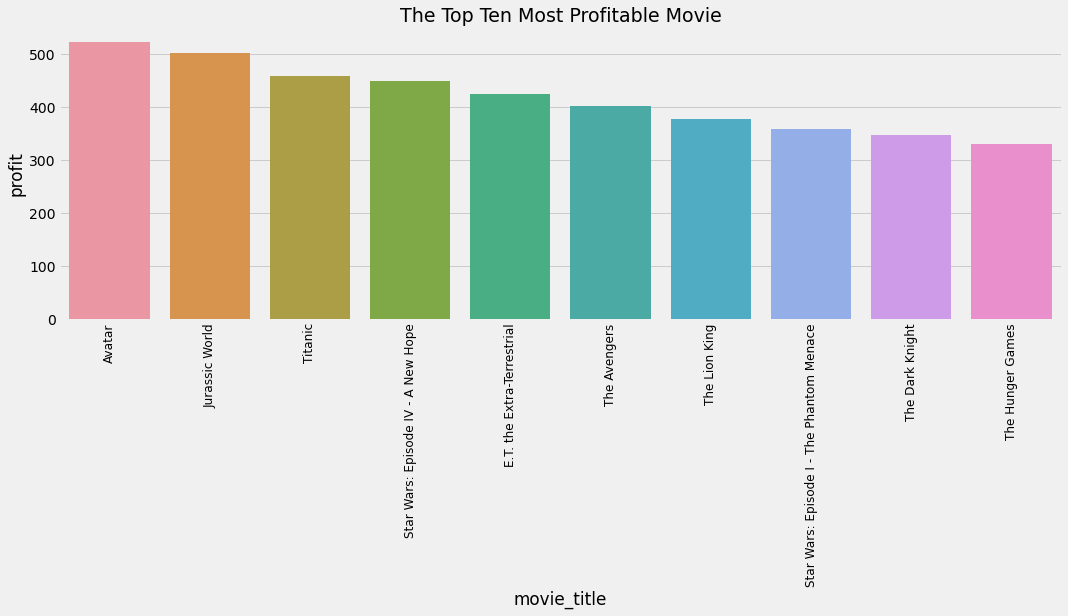

In [29]:
plt.title("The Top Ten Most Profitable Movie", fontsize = 19)
sns.barplot(Top10_movie["movie_title"], Top10_movie["profit"])
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

### Manipulating the duration and languages column

>- In manipulating these columns, we want to recategorize them into English and Foreign languages, while converting the duration to long and short movies
>- If a movie is less than 120 minutes, we categorize it as short movie, else as long movies
>- The language column has mainly English as its values

In [30]:
def language(x):
    if x == "English":
        return "English"
    else:
        return "Foreign"

def duration(x):
    if x <= 120:
        return "Short"
    else:
        return "Long"

In [31]:
data["language"] = data["language"].apply(language)
data["duration"] = data["duration"].apply(duration)

In [32]:
print(data["language"].value_counts(), "\n")
print(data["duration"].value_counts())

English    3607
Foreign     180
Name: language, dtype: int64 

Short    2888
Long      899
Name: duration, dtype: int64


**Let us create a new metric to evaluate social media popularity as:**

(num_user_for_reviews/num_voted_users) X (9(movie_facebook_likes) + 1(cast_total_facebook_likes))/10

In [33]:
data["SM_popularity"] = (data["num_user_for_reviews"]/data["num_voted_users"]) * ((9*data["movie_facebook_likes"]) + data["movie_facebook_likes"])/10

In [34]:
Top_SocialTen = data.sort_values(by = "SM_popularity", ascending = False).head(10)

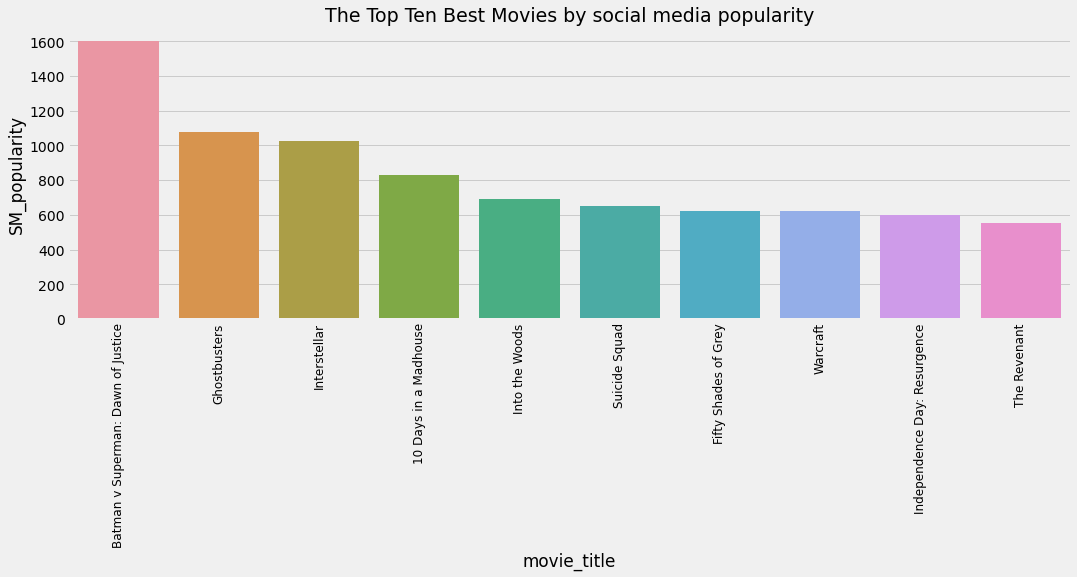

In [35]:
plt.title("The Top Ten Best Movies by social media popularity", fontsize = 19)
sns.barplot(Top_SocialTen["movie_title"], Top_SocialTen["SM_popularity"])
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

### Dealing with the genres of the movie

In [36]:
#let us first extract out the genres of the movies using the split function

data["MovieGenres"] = data["genres"].str.split("|")

In [37]:
data["genre1"] = data["MovieGenres"].apply(lambda x: x[0])
data["genre2"] = data["MovieGenres"].apply(lambda x: x[1] if len(x)>1 else x[0])
data["genre3"] = data["MovieGenres"].apply(lambda x: x[2] if len(x)>2 else x[0])
data["genre4"] = data["MovieGenres"].apply(lambda x: x[3] if len(x)>3 else x[0])

In [38]:
#To check for the movies with the highest rating for each genre amd the actors and director involved

genre_1 = data.loc[data.groupby(data["genre1"])["imdb_score"].idxmax()][["genre1", "movie_title", "imdb_score", 
                                                                         "director_name", "actor_1_name", "actor_2_name",
                                                                         "actor_3_name", "profit"]]

genre_2 = data.loc[data.groupby(data["genre2"])["imdb_score"].idxmax()][["genre2", "movie_title", "imdb_score", 
                                                                         "director_name", "actor_1_name", "actor_2_name", 
                                                                         "actor_3_name", "profit"]]

genre_3 = data.loc[data.groupby(data["genre3"])["imdb_score"].idxmax()][["genre3", "movie_title", 
                                                                         "imdb_score", "director_name", 
                                                                         "actor_1_name", "actor_2_name", 
                                                                         "actor_3_name", "profit"]]

genre_4 = data.loc[data.groupby(data["genre1"])["imdb_score"].idxmax()][["genre4", "movie_title", 
                                                                         "imdb_score", "director_name", 
                                                                         "actor_1_name", "actor_2_name", 
                                                                         "actor_3_name", "profit"]]

#Renaming the genre columns for easy appending and concatenation

genre_1.columns = ["genre", "movie_title", "imdb_score", "director_name", "actor_1_name", "actor_2_name", "actor_3_name", "profit"]
genre_2.columns = ["genre", "movie_title", "imdb_score", "director_name", "actor_1_name", "actor_2_name", "actor_3_name", "profit"]
genre_3.columns = ["genre", "movie_title", "imdb_score", "director_name", "actor_1_name", "actor_2_name", "actor_3_name", "profit"]
genre_4.columns = ["genre", "movie_title", "imdb_score", "director_name", "actor_1_name", "actor_2_name", "actor_3_name", "profit"]

In [39]:
grouped_genre = pd.concat([genre_1, genre_2, genre_3, genre_4], axis =0)
grouped_genre.reset_index(drop = False, inplace = True)
grouped_genre.columns = ["original_idx", "genre", "movie_title", "imdb_score", "director_name", "actor_1_name", "actor_2_name", "actor_3_name", "profit"]
grouped_genre.sample(2)

,original_idx,genre,movie_title,imdb_score,director_name,actor_1_name,actor_2_name,actor_3_name,profit
22,66,Crime,The Dark Knight,9.0,Christopher Nolan,Christian Bale,Heath Ledger,Morgan Freeman,348.316061
42,836,Comedy,Forrest Gump,8.8,Robert Zemeckis,Tom Hanks,Siobhan Fallon Hogan,Sam Anderson,274.691196


In [40]:
#Let us now retrieve the best directors in the combined genres

print("The Directors, Actors and Profit made from the best movies of each genre \n")

grouped_genre.loc[grouped_genre.groupby(grouped_genre["genre"])["imdb_score"].idxmax()][["genre", "movie_title", "imdb_score", 
                                                                            "director_name", "actor_1_name", 
                                                                            "actor_2_name", "actor_3_name", "profit"]].style.background_gradient(cmap = "Wistia")

The Directors, Actors and Profit made from the best movies of each genre 



,genre,movie_title,imdb_score,director_name,actor_1_name,actor_2_name,actor_3_name,profit
0,Action,The Dark Knight,9.000000,Christopher Nolan,Christian Bale,Heath Ledger,Morgan Freeman,348.316061
18,Adventure,The Lord of the Rings: The Return of the King,8.900000,Peter Jackson,Orlando Bloom,Billy Boyd,Bernard Hill,283.019252
19,Animation,Spirited Away,8.600000,Hayao Miyazaki,Bunta Sugawara,Ryûnosuke Kamiki,Miyu Irino,-8.950114
3,Biography,Schindler's List,8.900000,Steven Spielberg,Liam Neeson,Embeth Davidtz,Caroline Goodall,74.067179
4,Comedy,Forrest Gump,8.800000,Robert Zemeckis,Tom Hanks,Siobhan Fallon Hogan,Sam Anderson,274.691196
5,Crime,The Shawshank Redemption,9.300000,Frank Darabont,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,3.341469
6,Documentary,Samsara,8.500000,Ron Fricke,Collin Alfredo St. Dic,Balinese Tari Legong Dancers,Puti Sri Candra Dewi,-1.398153
24,Drama,The Shawshank Redemption,9.300000,Frank Darabont,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,3.341469
46,Family,Modern Times,8.600000,Charles Chaplin,Paulette Goddard,Stanley Blystone,Fred Malatesta,-1.336755
47,Fantasy,Star Wars: Episode V - The Empire Strikes Back,8.800000,Irvin Kershner,Harrison Ford,Kenny Baker,Anthony Daniels,272.158751


In [41]:
#Checking Out the min, max and mean of the amount grossed by each movie genre

genre1_gross = data[["genre1", "gross"]].groupby("genre1").agg(["sum", "max", "min", "count"]).reset_index()
genre2_gross = data[["genre2", "gross"]].groupby("genre2").agg(["sum", "max", "min", "count"]).reset_index()
genre3_gross = data[["genre3", "gross"]].groupby("genre3").agg(["sum", "max", "min", "count"]).reset_index()
genre4_gross = data[["genre4", "gross"]].groupby("genre4").agg(["sum", "max", "min", "count"]).reset_index()

In [42]:
genre1_gross.columns = ["genre", "sum", "max", "min", "count"]
genre2_gross.columns = ["genre", "sum", "max", "min", "count"]
genre3_gross.columns = ["genre", "sum", "max", "min", "count"]
genre4_gross.columns = ["genre", "sum", "max", "min", "count"]

In [43]:
genre_gross = pd.concat([genre1_gross, genre2_gross, genre3_gross, genre4_gross], axis = 0).reset_index(drop = True)

In [44]:
combined_genre_gross = genre_gross.groupby("genre").agg({"sum":"mean", "max": "mean", "min": "mean", "count": "sum"})

combined_genre_gross.columns = ["avg_gross", "avg_gross_max", "avg_gross_min", "count"]

In [45]:
combined_genre_gross["avg_gross_rescaled"] = combined_genre_gross["avg_gross"]/25

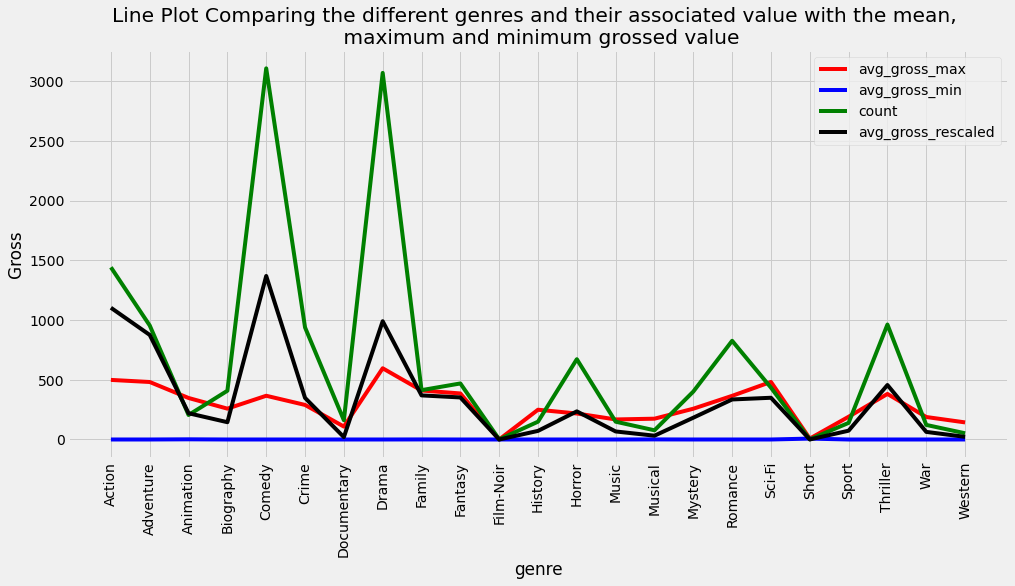

,avg_gross,avg_gross_max,avg_gross_min,count
genre,,,,
Action,27564.359050,498.686934,0.025775,1441
Adventure,21876.773760,481.155922,0.005613,954
Animation,5493.560177,347.365947,1.473860,205
Biography,3618.877320,258.183325,0.014927,408
Comedy,34214.228350,365.975766,0.003541,3106
Crime,8704.610064,289.220439,0.000874,938
Documentary,498.416783,108.198519,0.004671,161
Drama,24746.238887,596.004040,0.002111,3068
Family,9227.565667,410.138790,0.550186,413


In [46]:
plt.rcParams["figure.figsize"] = (15, 7)

rows_ = len(combined_genre_gross)

combined_genre_gross.drop(["avg_gross"], axis = 1).plot(kind = "line", color = ["r", "b", "g", "k"])
plt.xticks(np.arange(rows_), [i for i in combined_genre_gross.index], rotation = 90)
plt.ylabel("Gross")
plt.title("Line Plot Comparing the different genres and their associated value with the mean, \n maximum and minimum grossed value")
plt.show()

display(combined_genre_gross.drop("avg_gross_rescaled", axis = 1).style.background_gradient("RdBu"))

From the above vizualizations we see that `comedy,`  `action,`  `adventure` and `drama` have the highest grossing genres which may owe largely to the count of movies that was made under each genre or vice versa
- `Comedy` and `Drama` have almost the same number of counts but `comedy` comes out better among the two

In [47]:
#To compare the gross and profit of each genre

genre1_gross_p = data[["genre1", "gross", "profit"]].groupby("genre1").agg({"gross":"sum", "profit": ["sum", "count"]}).reset_index()
genre2_gross_p = data[["genre2", "gross", "profit"]].groupby("genre2").agg({"gross":"sum", "profit": ["sum", "count"]}).reset_index()
genre3_gross_p = data[["genre3", "gross", "profit"]].groupby("genre3").agg({"gross":"sum", "profit": ["sum", "count"]}).reset_index()
genre4_gross_p = data[["genre4", "gross", "profit"]].groupby("genre4").agg({"gross":"sum", "profit": ["sum", "count"]}).reset_index()

In [48]:
genre1_gross_p.columns = ["genre", "gross", "profit", "count"]
genre2_gross_p.columns = ["genre", "gross", "profit", "count"]
genre3_gross_p.columns = ["genre", "gross", "profit", "count"]
genre4_gross_p.columns = ["genre", "gross", "profit", "count"]

In [49]:
genre_gross_p = pd.concat([genre1_gross_p, genre2_gross_p, genre3_gross_p, genre4_gross_p], axis = 0).reset_index(drop = True)

In [50]:
combined_genre_gross_p = genre_gross_p.groupby("genre").agg({"gross":"mean", "profit": "mean", "count":"sum"})

In [51]:
combined_genre_gross_p.head()
combined_genre_gross_p.columns = ["avg_gross", "avg_profit", "count"]

In [52]:
combined_genre_gross_p["avg_gross_rescaled"] = combined_genre_gross_p["avg_gross"]/10

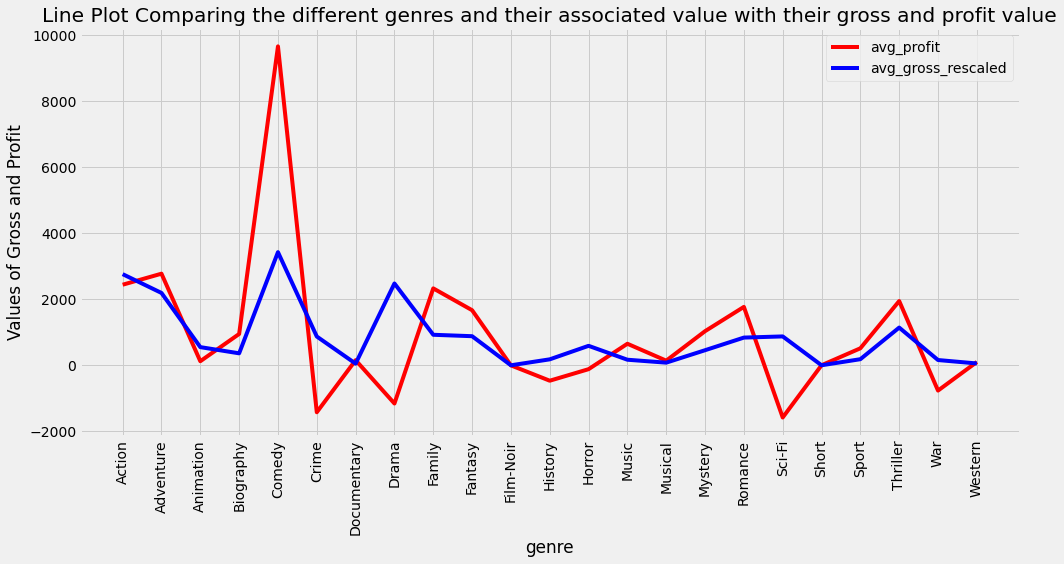

,avg_gross,avg_profit,count,avg_gross_rescaled
genre,,,,
Action,27564.359050,2436.623908,1441,2756.435905
Adventure,21876.773760,2770.310580,954,2187.677376
Animation,5493.560177,123.135202,205,549.356018
Biography,3618.877320,947.061211,408,361.887732
Comedy,34214.228350,9645.221546,3106,3421.422835
Crime,8704.610064,-1420.399967,938,870.461006
Documentary,498.416783,154.816721,161,49.841678
Drama,24746.238887,-1155.696069,3068,2474.623889
Family,9227.565667,2325.839692,413,922.756567


In [53]:
rows_ = len(combined_genre_gross_p)

combined_genre_gross_p.drop(["avg_gross", "count"], axis = 1).plot(kind = "line", color = ["r", "b", "g"])
plt.xticks(np.arange(rows_), [i for i in combined_genre_gross_p.index], rotation = 90)
plt.ylabel("Values of Gross and Profit")
plt.title("Line Plot Comparing the different genres and their associated value with their gross and profit value")
plt.show()

display(combined_genre_gross_p.style.background_gradient("RdBu"))

The top highest profitable movies are:
1. Comedy
2. Adventure
3. Action
4. Family
5. Romance
6. Thriller
> While, drama makes it top as one of the highest grossing movies, the profit in it is quite poor, with no explanation than its high cost. (Which we would justify in moment)

In [54]:
#Let us compare the cost, gross and profit with the change in year

In [55]:
data["Year"] = (pd.to_datetime(data["title_year"], format = "%Y").dt.year)

In [56]:
#Define function to group the 

In [57]:
genre1_year = data[["genre1", "profit", "gross", "budget", "Year"]].groupby(["genre1", "Year"]).agg({"profit": "sum", "budget":"sum", "gross": "sum"}).reset_index()
genre2_year =  data[["genre2", "profit", "gross", "budget", "Year"]].groupby(["genre2", "Year"]).agg({"profit": "sum", "budget":"sum", "gross": "sum"}).reset_index()
genre3_year =  data[["genre3", "profit", "gross", "budget", "Year"]].groupby(["genre3", "Year"]).agg({"profit": "sum", "budget":"sum", "gross": "sum"}).reset_index()
genre4_year =  data[["genre4", "profit", "gross", "budget", "Year"]].groupby(["genre4", "Year"]).agg({"profit": "sum", "budget":"sum", "gross": "sum"}).reset_index()

genre1_year.columns = ["genre", "year", "profit", "budget", "gross"]
genre2_year.columns = ["genre", "year", "profit", "budget", "gross"]
genre3_year.columns = ["genre", "year", "profit", "budget", "gross"]
genre4_year.columns = ["genre", "year", "profit", "budget", "gross"]

In [58]:
genre_year = pd.concat([genre1_year, genre2_year, genre3_year, genre4_year], axis = 0).reset_index()

In [59]:
genre_year_group = genre_year[["year", "genre", "profit", "gross", 
                               "budget"]].groupby(["genre", "year"]).agg({"profit": "sum", "budget":"sum", "gross": "sum"}).reset_index()

In [60]:
genre_year_group["profit_rescaled"] = genre_year_group["profit"]*10
genre_year_group["budget_rescaled"] = genre_year_group["budget"]*100
genre_year_group["gross_rescaled"] = genre_year_group["gross"] * 100

In [61]:
genre_year_group_sort = genre_year_group.sort_values(by = "year")

In [62]:
genre_year_group_sort1 = genre_year_group_sort[genre_year_group_sort["year"] > 1990].sort_values(by = "year")

In [63]:
genre_year_specific_drama = genre_year_group_sort1[genre_year_group_sort1["genre"].isin(["Comedy", "Adventure", "Action", "Family", "Romance", "Thriller", "Drama"])]

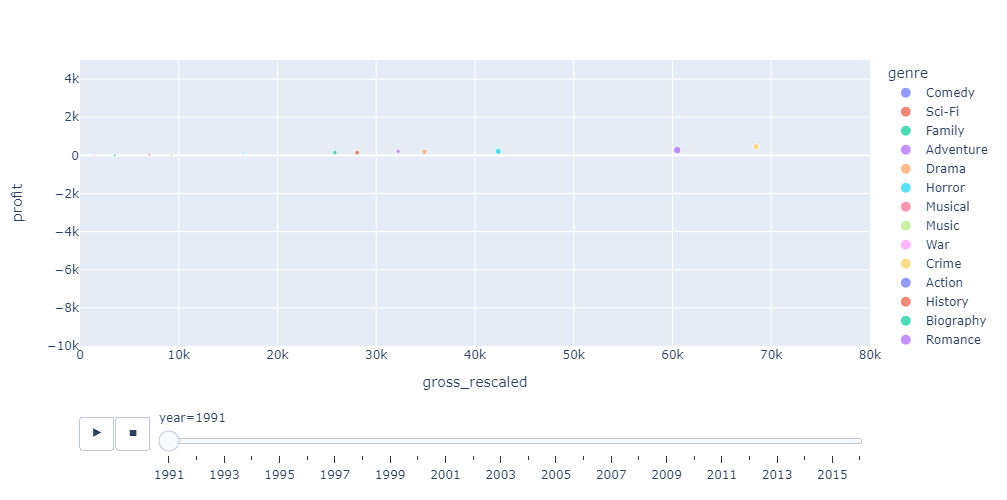

In [92]:
b = -10000

fig = px.scatter(genre_year_group_sort1 , x = "gross_rescaled", y = "profit",
           animation_frame = "year", animation_group = "genre",
           size = "budget", color = "genre", hover_name = "genre",
           log_x = False, log_y = False, size_max = 40, range_x = [1, 80000], range_y = [b, 5000],
          height = 500, width = 1000, render_mode = "svg")
fig

In [93]:
#Exporting plotly gif into chart studio

import chart_studio.plotly as py
import chart_studio.tools as tls
import chart_studio

chart_studio.tools.set_credentials_file(username='deekligh', api_key='c4qR1RQGRL0uhybOFHuz')

py.plot(fig, filename = 'file', auto_open=True)

'https://plotly.com/~deekligh/3/'

**Link above can be used to view the gif file**

Note: The above diagram is a gif showing the gross on the x axis, the profit on the y-axis and the size as the budget of each genre...To just highlight a few interesting hindsight obtained:
- in 1997, the `adventure and action` increased their **budget** massively, which combined together did more than double of the **budget** of both `comedy and drama.` This did not produce the result anticipated. Both adventure and action had a negative profit that year, while drama and comedy which did not increase their budget reached higher gross and profit conseqently.
- 1998 came and `drama` performed poorly despite doubling their budget. Action, Drama, Fantasy and Animation all learned from the previous year loss and reduced their budget heavily. This produced profit for the action and adventure genre while both grossed similar amount in the previous year respectively
- It took 4 years for drama to try to reclaim its spot in 2002, but comedy was well ahead, while action and adventure genre were on its tail. It is worthy to note that Adventure, Romance, Family and Fantasy were all performing well according to the profit metrics.
- In 2003, comedy reache a very high profit with the 2nd highest budget, while action with the highest budget was well far from the profit reached
- 2004, Action genre once again suffers from increasing their budget without producing desired gross
- 2005, Drama had the highest budget, close to the sum of the budget of comedy, Adventure, Action and Family together, it sufferref that year the most with a record low loss among all genres of all time between 1991 to the present 2005

> The Begining of the Fall of the comedy genre
- in 2006, The comedy genre made the huge mistake of quardupling their budget, although their gross increased, it did not match the quadrupled cost and led to a woeful profit performance.
- It came back in 2007 but with lesser gross and drastically lower budget.
- From 2009 to 2016, Action genre kept grossing quite a lot but their budget did not allow for much profit to be made compared to the comedy.

Generally the budget of the action genre was usually one of the highest and has sufficiently one of the highest gross from 2009.

The movie industry race is a slow and a steady one. Unnecessay influx of budget into a particular genre can be hurtful. And while you are at the top, reduction in the budget can kick you out of the road, for the other genres.

    Further Analysis would be that: An increase in the budget of a movie signifies more people entering that particular genre, so we would compare rating against counts and budget/profit as the size and see what hindisght we can see

In [65]:
#lets plot the count against the profit over the years

yearly_count_profit = data[["Year", "profit"]].groupby("Year").agg(["sum", "count"])
yearly_count_profit = yearly_count_profit.sort_values("Year")
yearly_count_profit.columns = ["sum_profit", "count_movies"]
yearly_count_profit["sum_profit"] = yearly_count_profit["sum_profit"]/100

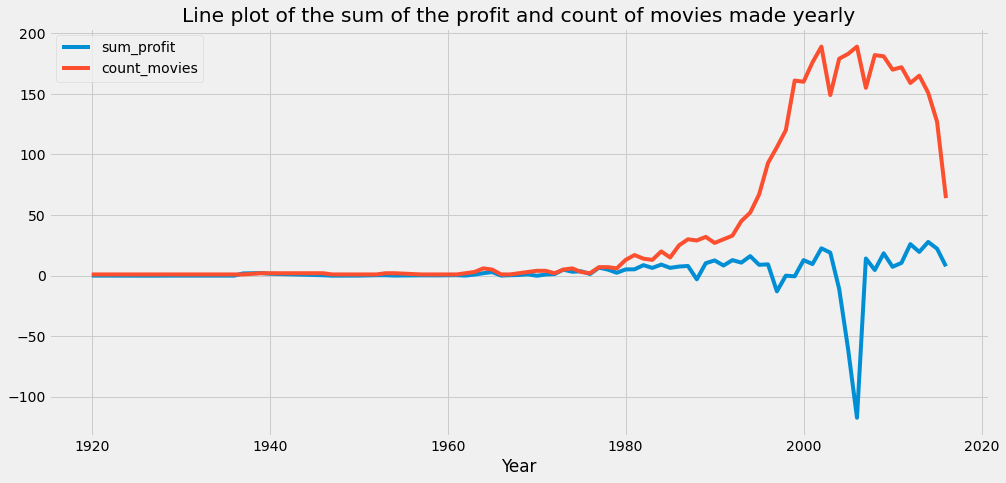

In [66]:
yearly_count_profit.plot(kind = "line")
plt.title("Line plot of the sum of the profit and count of movies made yearly")
plt.xticks()
plt.show()

In [67]:
#We plot a bubble plot of count against profit for the different genres accross the years

In [68]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'num_user_for_reviews',
       'language', 'country', 'budget', 'title_year', 'imdb_score',
       'movie_facebook_likes', 'profit', 'SM_popularity', 'MovieGenres',
       'genre1', 'genre2', 'genre3', 'genre4', 'Year'],
      dtype='object')

In [69]:
genre1_year_ = data[["genre1", "profit", "imdb_score", "Year"]].groupby(["genre1", "Year"]).agg({"profit": ["sum", "count"], "imdb_score":"mean"}).reset_index()
genre2_year_ =  data[["genre2", "profit", "imdb_score", "Year"]].groupby(["genre2", "Year"]).agg({"profit": ["sum", "count"], "imdb_score":"mean"}).reset_index()
genre3_year_ =  data[["genre3", "profit", "imdb_score", "Year"]].groupby(["genre3", "Year"]).agg({"profit": ["sum", "count"], "imdb_score":"mean"}).reset_index()
genre4_year_ =  data[["genre4", "profit", "imdb_score", "Year"]].groupby(["genre4", "Year"]).agg({"profit": ["sum", "count"], "imdb_score":"mean"}).reset_index()

genre1_year_.columns = ["genre", "year", "profit", "count", "rating"]
genre2_year_.columns = ["genre", "year", "profit", "count", "rating"]
genre3_year_.columns = ["genre", "year", "profit", "count", "rating"]
genre4_year_.columns = ["genre", "year", "profit", "count", "rating"]

In [70]:
genre_year_ = pd.concat([genre1_year_, genre2_year_, genre3_year_, genre4_year_], axis = 0).reset_index()

In [71]:
genre_year_.columns

Index(['index', 'genre', 'year', 'profit', 'count', 'rating'], dtype='object')

In [72]:
genre_year_group_ = genre_year_[["year", "genre", "profit", "count", 
                               "rating"]].groupby(["genre", "year"]).agg({"profit": "sum", "count":"sum", "rating": "mean"}).reset_index()

In [73]:
genre_year_group_sort_ = genre_year_group_[genre_year_group_["year"] > 1990].sort_values(by = "year")

In [74]:
genre_year_group_sort_["rating_rescaled"] = genre_year_group_sort_["rating"]*100

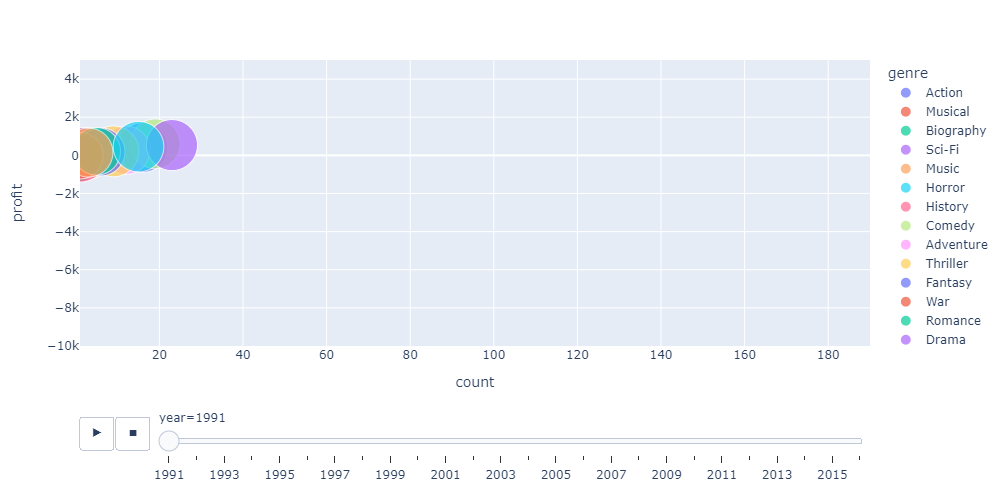

In [94]:
b = -10000

fig1 = px.scatter(genre_year_group_sort_ , x = "count", y = "profit",
           animation_frame = "year", animation_group = "genre",
           size = "rating_rescaled", color = "genre", hover_name = "genre",
           log_x = False, log_y = False, size_max = 40, range_x = [1, 190], range_y = [b, 5000],
          height = 500, width = 1000, render_mode = "svg")
fig1

In [95]:
py.plot(fig1, filename = 'file', auto_open=True)

'https://plotly.com/~deekligh/3/'

**Link above can be used to view the gif file**

### Analysing the language column

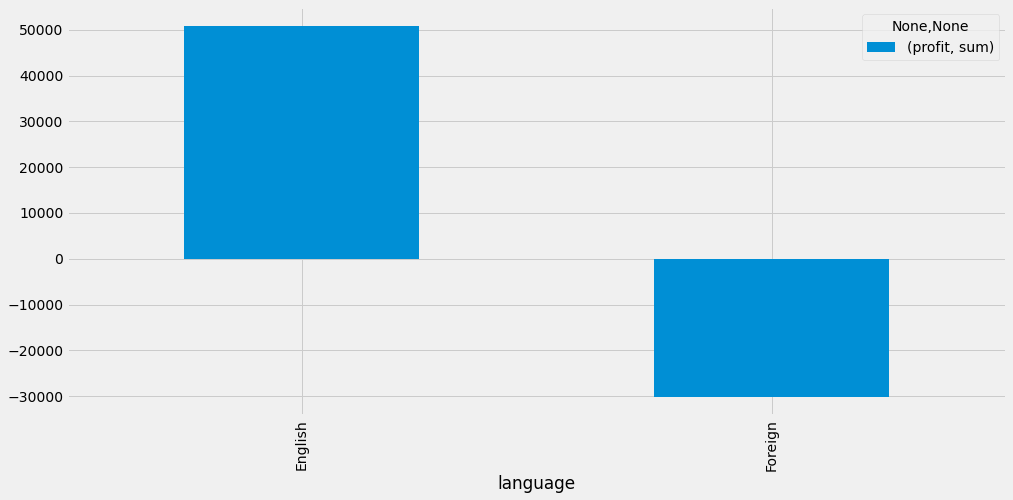

In [76]:
#Comapare the profit made between both english and Foreign movies overall

data[["language", "profit"]].groupby("language").agg(["sum", "count"]).drop(("profit", "count"), axis = 1).plot(kind = "bar", label = ["r", "k"])
plt.show()
display(data[["language", "profit"]].groupby("language").agg(["sum", "count"]).style.background_gradient("Greens"))

Text(0.5, 1.0, 'Time Series line plot of the comaprism between English and Foreign Languages')

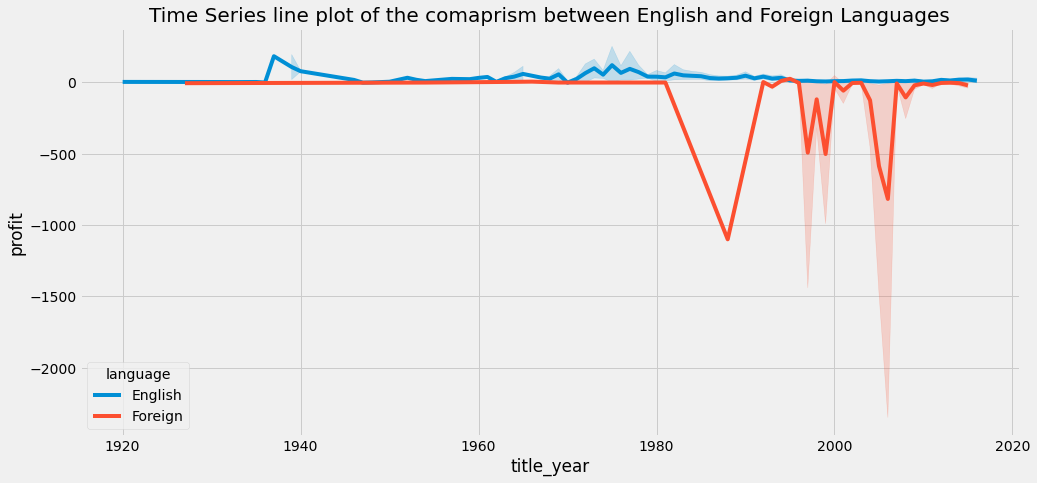

In [77]:
#Construct Time Series of data set

sns.lineplot(data["title_year"], data["profit"], hue = data["language"])
plt.title("Time Series line plot of the comaprism between English and Foreign Languages", fontsize = 20)

Foreign movies were in loss overall so many of the times

In [78]:
#movies that performed the worst overall times
data.sort_values(by = "profit")[["movie_title", "Year", "language", "profit"]].head(10).style.background_gradient("Reds")

,movie_title,Year,language,profit
2988,The Host,2006,Foreign,-12213.298588
3859,Lady Vengeance,2005,Foreign,-4199.788333
3005,Fateless,2005,Foreign,-2499.804112
2323,Princess Mononoke,1997,Foreign,-2397.701809
2334,Steamboy,2004,Foreign,-2127.109510
3423,Akira,1988,Foreign,-1099.560838
4542,Godzilla 2000,1999,Foreign,-989.962610
3851,Tango,1998,Foreign,-698.312689
3075,Kabhi Alvida Naa Kehna,2006,Foreign,-696.724557
3273,Kites,2010,English,-598.397534


In [79]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'num_user_for_reviews',
       'language', 'country', 'budget', 'title_year', 'imdb_score',
       'movie_facebook_likes', 'profit', 'SM_popularity', 'MovieGenres',
       'genre1', 'genre2', 'genre3', 'genre4', 'Year'],
      dtype='object')

Text(0.5, 1.0, 'Gross comparism between Long and Short Movies')

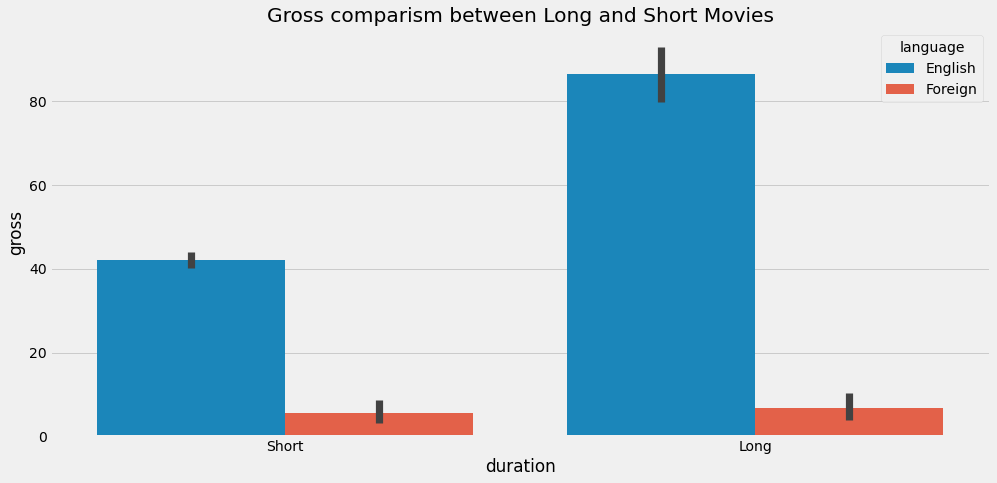

In [82]:
#plotting the barplot of comapring the gross of long and short movies

sns.barplot(data["duration"], data["gross"], hue = data["language"])
plt.title("Gross comparism between Long and Short Movies")

### Relationship between duration of movies, genre and imdb score

In [83]:
print("average rating of long movies is: \n{0:.2f}".format(data[data["duration"] == "Long"]["imdb_score"].mean()))

print("average rating of short movies is: \n{0:.2f}".format(data[data["duration"] == "Short"]["imdb_score"].mean()))

average rating of long movies is: 
7.06
average rating of short movies is: 
6.27


In [84]:
#Relationship between duration of movies, genre and imdb score

#Create table for short movies
print("Top 5 short movies by their imdb rating")
display(data[data["duration"] == "Short"][["movie_title", "imdb_score", "genres"]].sort_values(by = "imdb_score", ascending = False).head())

print("Top 5 long movies by their imdb rating")
display(data[data["duration"] == "Long"][["movie_title", "imdb_score", "genres"]].sort_values(by = "imdb_score", ascending = False).head())

Top 5 short movies by their imdb rating


,movie_title,imdb_score,genres
3175,American History X,8.6,Crime|Drama
4427,Modern Times,8.6,Comedy|Drama|Family
3592,The Usual Suspects,8.6,Crime|Drama|Mystery|Thriller
3716,Memento,8.5,Mystery|Thriller
509,The Lion King,8.5,Adventure|Animation|Drama|Family|Musical


Top 5 long movies by their imdb rating


,movie_title,imdb_score,genres
1937,The Shawshank Redemption,9.3,Crime|Drama
3466,The Godfather,9.2,Crime|Drama
2837,The Godfather: Part II,9.0,Crime|Drama
66,The Dark Knight,9.0,Action|Crime|Drama|Thriller
339,The Lord of the Rings: The Return of the King,8.9,Action|Adventure|Drama|Fantasy


### Information and Defining Functions to retrieving information about an actor

In [85]:
class actor():
    
    def __init__(self, x):
        self.x = x
        
        a = data[data["actor_1_name"] == self.x]
        b = data[data["actor_2_name"] == self.x]
        c = data[data["actor_3_name"] == self.x]
    
        d = a.append(b)
        self.table_ = d.append(c)
        
        genre_arr = np.array(reduce(lambda x, y: x+y, self.table_[["genres"]].apply(lambda x: x.str.split("|"))["genres"]))
        genre_dict = dict(zip(np.unique(genre_arr, return_counts = True)[0], np.unique(genre_arr, return_counts = True)[1]))
        
        self.sorted_genres = dict(sorted(genre_dict.items(), key = lambda x: x[1]))
        
    #Obatain Time period of actor
    def time(self):
        upper_year = self.table_["Year"].max()
        lower_year = self.table_["Year"].min()
        if upper_year == 2016:
            upper_year = "Till date"
        return f"Time Period of {self.x} is: {lower_year} - {upper_year}"
    def gross(self, d):
        if d == "max":
            self.max_gross = self.table_["gross"].max()
            return f"Maximum amount grossed by {self.x} is {self.max_gross} million dollars"
        elif d == "min":
            self.min_gross_ = self.table_["gross"].min()
            return f"Minimum amount grossed by {self.x} is {self.min_gross_} million dollars"
        elif d == "avg":
            self.avg_gross = self.table_["gross"].mean()
            return f"Average amount grossed by {self.x} is {self.avg_gross} million dollars"
        else:
            raise "Key Error: Expecting one key either min, max or avg"
            pass
        
    def imdb_score(self):
        self.avg_imdb_ = self.table_["imdb_score"].mean()
        return f"The average imdb rating of {self.x} is {self.avg_imdb_}"
    
    def genre(self):
        genre_arr = np.array(reduce(lambda x, y: x+y, self.table_[["genres"]].apply(lambda x: x.str.split("|"))["genres"]))
        genre_dict = dict(zip(np.unique(genre_arr, return_counts = True)[0], np.unique(genre_arr, return_counts = True)[1]))
        
        self.sorted_genres = dict(sorted(genre_dict.items(), key = lambda x: x[1]))
        
        return self.sorted_genres
    #average imdb rating, most common genres, average critics received
    
    def recommend_movie(self):
            top_actor_genre = list(self.sorted_genres.keys())[:4]
            genre1_rec = data[data["genre1"].isin(top_actor_genre)][["director_name", "movie_title", "genres", "imdb_score"]]
            genre2_rec = data[data["genre2"].isin(top_actor_genre)][["director_name", "movie_title", "genres", "imdb_score"]]
            genre3_rec = data[data["genre3"].isin(top_actor_genre)][["director_name", "movie_title", "genres", "imdb_score"]]
            genre4_rec = data[data["genre1"].isin(top_actor_genre)][["director_name", "movie_title", "genres", "imdb_score"]]
            a_ = genre1_rec.append(genre2_rec)
            b_ = genre3_rec.append(genre3_rec)
            
            table_recommended = a_.append(b_).drop_duplicates().sort_values("imdb_score", ascending = False).head(15)
            
            return table_recommended

    def __repr__(self):
        return f"Actor {self.x} has acted in {len(self.table_)} number of movie(s) so far"

In [87]:
from functools import reduce
Dean = actor("Dean Dawson")
print(Dean.genre())
print(Dean.gross("avg"))
print(Dean.imdb_score())

{'Action': 1, 'Drama': 1, 'History': 1, 'War': 1}
Average amount grossed by Dean Dawson is 0.031662 million dollars
The average imdb rating of Dean Dawson is 6.8


In [896]:
Dean.recommend_movie()

,director_name,movie_title,genres,imdb_score
1937,Frank Darabont,The Shawshank Redemption,Crime|Drama,9.3
3466,Francis Ford Coppola,The Godfather,Crime|Drama,9.2
66,Christopher Nolan,The Dark Knight,Action|Crime|Drama|Thriller,9.0
2837,Francis Ford Coppola,The Godfather: Part II,Crime|Drama,9.0
3355,Quentin Tarantino,Pulp Fiction,Crime|Drama,8.9
339,Peter Jackson,The Lord of the Rings: The Return of the King,Action|Adventure|Drama|Fantasy,8.9
1874,Steven Spielberg,Schindler's List,Biography|Drama|History,8.9
2051,Irvin Kershner,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Fantasy|Sci-Fi,8.8
97,Christopher Nolan,Inception,Action|Adventure|Sci-Fi|Thriller,8.8
683,David Fincher,Fight Club,Drama,8.8


In [88]:
#Define class for director to inherit from actor classs

class director(actor):
    def __init__(self, director):
        self.director = director
        
        self.table_ = data[data["director_name"] == self.director]
        
        genre_arr = np.array(reduce(lambda x, y: x+y, self.table_[["genres"]].apply(lambda x: x.str.split("|"))["genres"]))
        genre_dict = dict(zip(np.unique(genre_arr, return_counts = True)[0], np.unique(genre_arr, return_counts = True)[1]))
        
    def __repr__(self):
        return f"Director {self.director} has acted in {len(self.table_)} number of movie(s) so far"

In [89]:
#using Interact function to filter tables

@interact
def specific_rows(columns = ["profit", "gross"], count = 200):
    return data[data[columns] > count][["movie_title", "genres", "language", "budget", "gross", "profit"]]

interactive(children=(Dropdown(description='columns', options=('profit', 'gross'), value='profit'), IntSlider(…